In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#load hourly data
hourly_data=pd.read_csv(('https://raw.githubusercontent.com/'\
                        'PacktWorkshops/'\
                        'The-Data-Analysis-Workshop/'\
                        'master/Chapter01/data/hour.csv'))
hourly_data
                      

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [2]:
#print generic statistic about the data
print(f'The size of the data is: {hourly_data.shape}')
print(f'The missing values in the data is:\
     {hourly_data.isnull().sum().sum()}')

The size of the data is: (17379, 17)
The missing values in the data is:     0


In [3]:
#Get statistics on the numerical aspect
hourly_data.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


we can split the columns into three main groups:

• temporal features: This contains information about the time at which the
record was registered. This group contains the dteday, season, yr, mnth, hr,
holiday, weekday, and workingday columns.

• weather related features: This contains information about the weather
conditions. The weathersit, temp, atemp, hum, and windspeed columns
are included in this group.

• record related features: This contains information about the number
of records for the specific hour and date. This group includes the casual,
registered, and cnt columns.

# DATA PROCESSING

In [4]:
#create a copy of the original dataset
preprocessed_data=hourly_data.copy()

In [5]:
#transform seasons
season_mapping={1:'winter', 2:'spring',\
               3:'summer', 4:'fall'}
preprocessed_data['season']=preprocessed_data['season'].apply(lambda x:season_mapping[x])

In [6]:
#transform year
year_mapping={0:2011,1:2012}
preprocessed_data['yr']=preprocessed_data['yr'].apply(lambda x:year_mapping[x])

In [7]:
#transform weekdays
weekdays_mapping={0:'Sunday', 1:'Monday',2:'Tuesday',\
                 3:'Wednesday', 4:'Thursday', 5:'Friday',\
                 6:'Saturday'}
preprocessed_data['weekday']=preprocessed_data['weekday'].apply(lambda x:weekdays_mapping[x])

In [8]:
#transform weathersit
weather_mapping={1:'clear',2:'cloudy',\
                3:'light snow/rain', 4:'heavy snow/rain'}
preprocessed_data['weathersit']=preprocessed_data['weathersit'].apply(lambda x:weather_mapping[x])

In [9]:
#transform hum and windspeed
humidity_mapping=preprocessed_data['hum']*100
windspeed_mapping=preprocessed_data['windspeed']*67

In [10]:
#visualize the transformed columns
cols=['season','yr','weekday','weathersit','hum','windspeed']
preprocessed_data[cols].sample(10,random_state=123)

,season,yr,weekday,weathersit,hum,windspeed
5792,summer,2011,Saturday,clear,0.74,0.1343
7823,fall,2011,Sunday,clear,0.43,0.4627
15426,fall,2012,Tuesday,cloudy,0.77,0.0896
15028,fall,2012,Sunday,clear,0.51,0.3284
12290,spring,2012,Friday,cloudy,0.89,0.1940
3262,spring,2011,Friday,clear,0.64,0.1045
10763,spring,2012,Thursday,clear,0.42,0.3582
12384,spring,2012,Tuesday,light snow/rain,0.82,0.1642
6051,summer,2011,Wednesday,clear,0.52,0.2836
948,winter,2011,Saturday,clear,0.80,0.0000


Registered versus Casual Use Analysis

In [11]:
"""
assert that the sum of casual rides and registered rides are equal to total number of rides
"""
assert(preprocessed_data.casual + preprocessed_data.registered == preprocessed_data.cnt).all(),\
'The sum of sasual rides and rigistered rides is not equal to total rides'

C:\Users\austi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\austi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


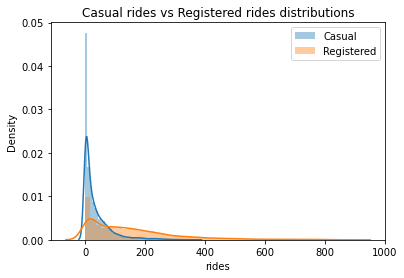

In [12]:
#plot the distribution of casual ride vs registered ride
sns.distplot(preprocessed_data['casual'],label='Casual')
sns.distplot(preprocessed_data['registered'],label='Registered')
plt.legend()
plt.xlabel('rides')
plt.title('Casual rides vs Registered rides distributions')
plt.savefig('rides_distribution.png',format='png')

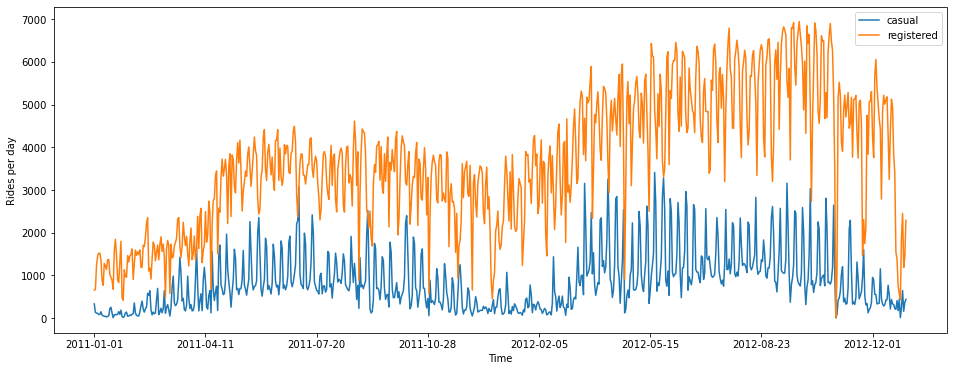

In [13]:
#plot evoution of rides over timea
plot_data=preprocessed_data[['casual','registered','dteday']]
ax=plot_data.groupby('dteday').sum().plot(figsize=(16,6))
ax.set_xlabel('Time')
ax.set_ylabel('Rides per day')
plt.savefig('daily_rides.png',format='png')

To smooth out the curves we find the rolling mean and standard deviation of the two time series and plot those

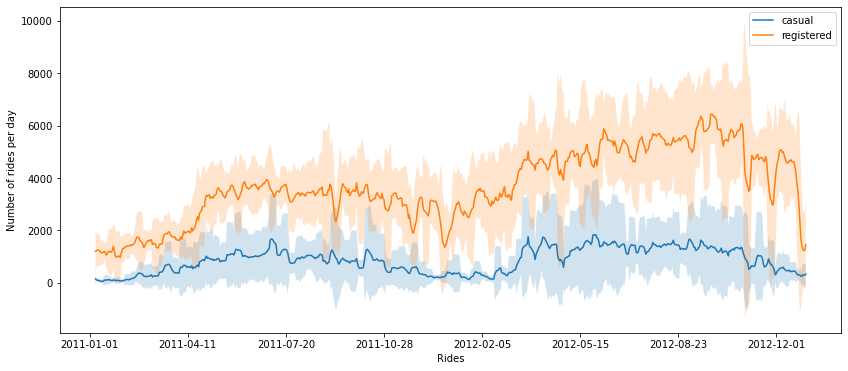

In [14]:
"""
create new dataframes with neccesary to plotting the columns, and obtain
the number of rides per day by grouping over each day_
"""
plot_data=preprocessed_data[['casual','registered','dteday']]
plot_data=plot_data.groupby('dteday').sum()

"""
define window for computing the rolling mean and standard deviation
"""
window=7
rolling_means=plot_data.rolling(window).mean()
rolling_deviation=plot_data.rolling(window).std()

"""
create a plot of series, where we first plot the series of rolling means, then we color
the zone between rolling means +-2 rolling standard deviations
"""
ax=rolling_means.plot(figsize=(14,6))
ax.fill_between(rolling_means.index,rolling_means['casual'] +2*rolling_deviation['casual'],\
               rolling_means['casual'] -2*rolling_deviation['casual'],alpha=0.2)
ax.fill_between(rolling_means.index, rolling_means['registered'] +2*rolling_deviation['registered'],\
               rolling_means['registered'] -2*rolling_deviation['registered'],alpha=0.2)
ax.set_xlabel('Rides')
ax.set_ylabel('Number of rides per day')
plt.savefig('aggregated_rides.png',format='png')

C:\Users\austi\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


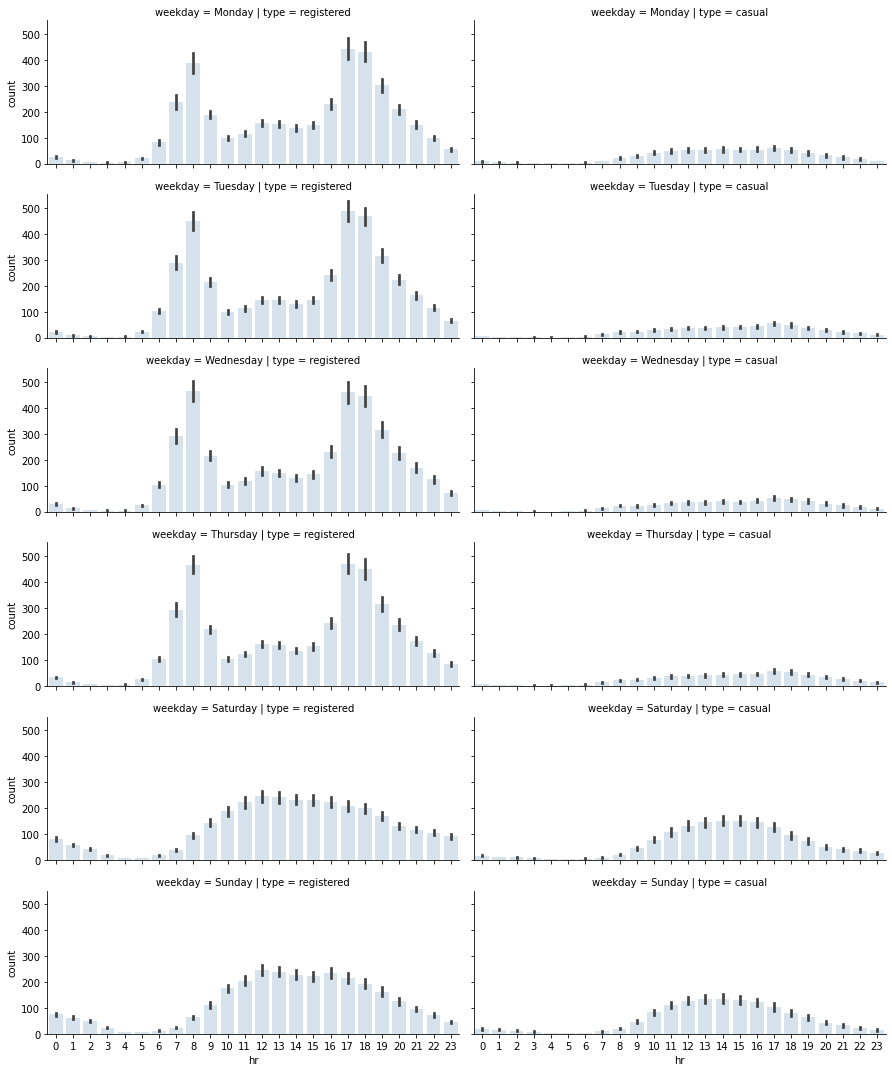

In [15]:
plot_data=preprocessed_data[['hr','weekday','registered','casual']]

"""
Transform the data into a format, in number of entries are computed as a count,
for each distinct hr, weekday, type(registered or casual)
"""
plot_data=plot_data.melt(id_vars=['hr','weekday'],\
                        var_name='type',value_name='count')

"""
create a Facetgrid object, in which grid plot is to be produced.
As a column we have different days of the week
As rows we have various types(casual/registered)
"""

grid=sns.FacetGrid(plot_data, row='weekday',col='type',height=2.5,aspect=2.5,
             row_order=['Monday','Tuesday','Wednesday','Thursday','Saturday','Sunday'])
#populate the facetgrid with specific plots.
grid.map(sns.barplot,'hr','count',alpha=.2)
grid.savefig('hourly_weekday_distribution.png',format='png')

# Analyzing Seasonal Impact on Rides

In [16]:
#select asubset of data
plot_data=preprocessed_data[['hr','season','registered','casual']]

In [17]:
#unpivot data from wide to long format
plot_data=plot_data.melt(id_vars=['hr','season'],var_name='type',\
                        value_name='count')

C:\Users\austi\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


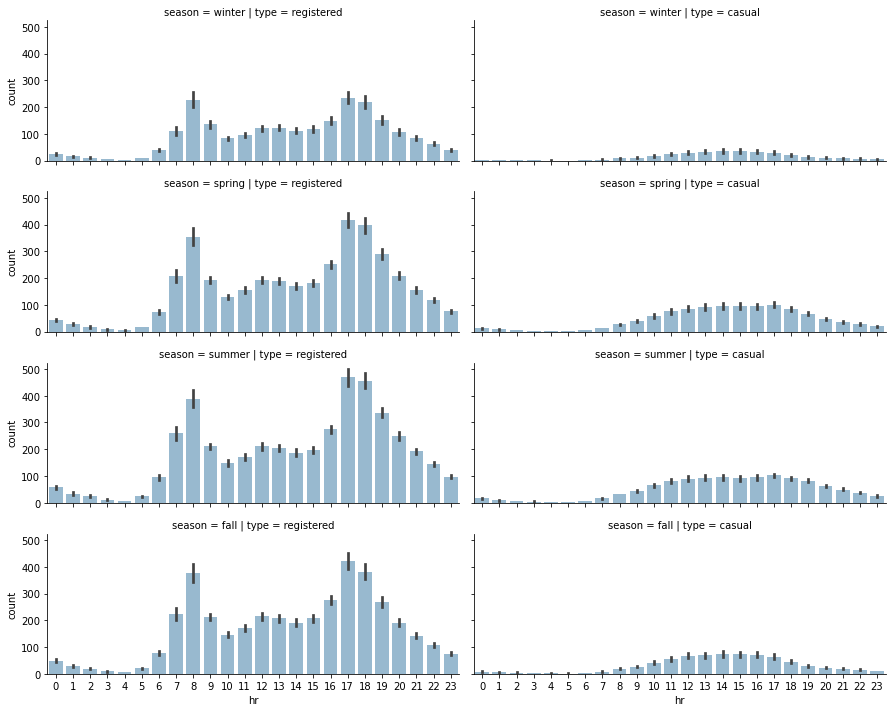

In [18]:
grid = sns.FacetGrid(plot_data, row='season',col='type', height=2.5, aspect=2.5, \
                     row_order=['winter', 'spring','summer', 'fall'])

# apply plotting function to each element in the grid
grid.map(sns.barplot, 'hr', 'count', alpha=0.5)
grid.savefig('season_hour_distribution.png',format='png')

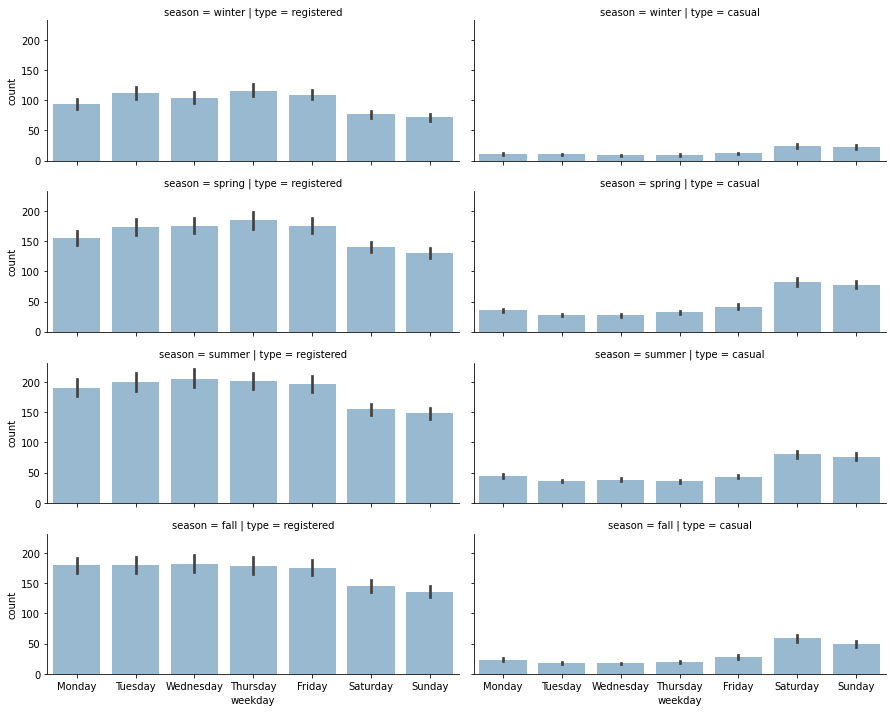

In [19]:
plot_data = preprocessed_data[['weekday', 'season', 'registered', 'casual']]
plot_data = plot_data.melt(id_vars=['weekday', 'season'], var_name='type', value_name='count')

grid = sns.FacetGrid(plot_data, row='season', col='type', height=2.5, aspect=2.5, 
                     row_order=['winter', 'spring', 'summer', 'fall'])
grid.map(sns.barplot, 'weekday', 'count', alpha=0.5, 
         order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# save figure
grid.savefig('weekday_season_distribution.png', format='png')

# Hypothesis Tests

# Estimating Average Registered Rides

In [20]:
#compute the statistical mean of registered rides
population_mean=preprocessed_data.registered.mean()
population_mean

153.78686920996606

In [21]:
#get sample of data(summer 2011)
sample_data=preprocessed_data[(preprocessed_data.season=='summer')&(preprocessed_data.yr==2011)].\
                                                                    registered
sample_data

4010     23
4011     12
4012      5
4013      2
4014      7
       ... 
6245    388
6246    250
6247    194
6248    166
6249     99
Name: registered, Length: 2240, dtype: int64

In [22]:
"""
Specify the significance level. A standard value is 0.05 (that is, when performing
the statistical test), if the p-value obtained by the statistical test is less than 0.05,
you can reject the null hypothesis by at least 95%
"""

#perfom t-test and compute p-value
from scipy.stats import ttest_1samp
test_result=ttest_1samp(sample_data,population_mean)
print(f"Test statistics :{test_result[0]}, P-value :{test_result[1]}")

Test statistics :-3.491969148378619, P-value :0.0004887645279519517


The result of the previous test returns a p-value smaller than 0.001, which is less
than the predefined critical value. Therefore, you can reject the null hypothesis
and assume that the alternative hypothesis is correct

This time taking as a sample 5% of the registered rides (selected randomly)

In [23]:
# get sample as 5% of the full data
import random
random.seed(111)
sample_unbiased = preprocessed_data.registered.sample(frac=0.05)
test_result_unbiased = ttest_1samp(sample_unbiased, population_mean)
print(f"Unbiased test statistic: {test_result_unbiased[0]}, p-value: {test_result_unbiased[1]}")

Unbiased test statistic: -2.2298084119463173, p-value: 0.02601524017260317


This time, the computed p-value is equal to 0.45, which is much larger than the critical
0.05, and so, you cannot reject the null hypothesis

# Hypothesis Testing on Registered Rides

Formulation of hypothesis
H_0 : average registered rides over weekdays-average registered rides over
weekend=0
and
H_a : average registered rides over weekdays-average registered rides over
weekend≠0

In [24]:
#define mask, indicating if the day is workday or weekend
weekend_days=['Saturday','Sunday']
weekend_days_mask=preprocessed_data.weekday.isin(weekend_days)
working_days_mask=~preprocessed_data.weekday.isin(weekend_days)

#select registered rides on weekend days and working days
weekend_data=preprocessed_data.registered[weekend_days_mask]
workingday_data=preprocessed_data.registered[working_days_mask]

In [25]:
#perform t-test
from scipy.stats import ttest_ind
ttest_result=ttest_ind(weekend_data,workingday_data)
print(f"Test Statistics :{ttest_result[0]:.03f}, P-value :{ttest_result[1]:.03f}")

Test Statistics :-16.004, P-value :0.000


The resulting p-value from this test is less than 0.0001, which is far below the
standard critical 0.05 value. As a conclusion, we can reject the null hypothesis
and confirm that our initial observation is correct: that is, there is a statistically
significant difference between the number of rides performed during working
days and the weekend.

C:\Users\austi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\austi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


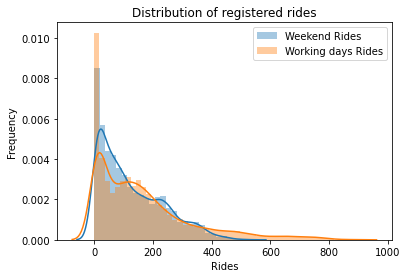

In [26]:
"""
plot distribution of registered working vs weekend days
"""
sns.distplot(weekend_data, label='Weekend Rides')
sns.distplot(workingday_data,label='Working days Rides')
plt.legend()
plt.xlabel('Rides')
plt.ylabel('Frequency')
plt.title('Distribution of registered rides')
plt.savefig('registered_distribution.png', format='png')

Performing the same type of hypothesis testing to validate the second assumption
from the last section— that is, casual users perform more rides during the
weekend. In this case, the null hypothesis is that the average number of rides
during working days is the same as the average number of rides during the
weekend, both performed only by casual customers. The alternative hypothesis
will then result in a statistically significant difference in the average number of
rides between the two groups:

In [27]:
#select casual rides from weekend and working days
casual_weekend=preprocessed_data.casual[weekend_days_mask]
casual_workingdays=preprocessed_data.casual[working_days_mask]

#perform t-test
test_res=ttest_ind(casual_weekend,casual_workingdays)
print(f"Test Statistics :{test_res[0]:.03f}, P-value :{test_res[1]:.03f}")

Test Statistics :41.077, P-value :0.000


C:\Users\austi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\austi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


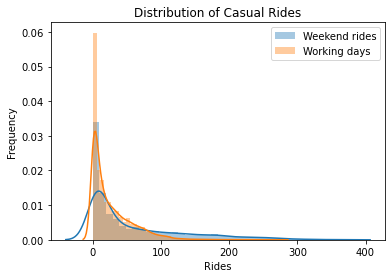

In [28]:
#plot distribution of casual for both weekend and working days
sns.distplot(casual_weekend, label='Weekend rides')
sns.distplot(casual_workingdays,label='Working days')
plt.legend()
plt.xlabel('Rides')
plt.ylabel('Frequency')
plt.title('Distribution of Casual Rides')
plt.savefig('Distribution_of_Casual Rides.png',format='png')

The p-value returned from the previous code snippet is 0, which is strong
evidence against the null hypothesis. Hence, we can conclude that casual
customers also behave differently over the weekend (in this case, they tend to
use the bike sharing service more

In conclusion, we can say that there is a statistically significant difference between
the number of rides on working days and weekend days for both casual and
registered customers.

# Analysis of Weather-Related Features

In [40]:
def plot_correlations(data, col):
    # get correlation between col and registered rides
    corr_r = np.corrcoef(data[col], data["registered"])[0,1]
    ax = sns.regplot(x=col, y="registered", data=data,
                     scatter_kws={"alpha":0.05}, \
                     label=f"Registered rides \(correlation: {corr_r:.3f})")
    
    # get correlation between col and casual rides
    corr_c = np.corrcoef(data[col], data["casual"])[0,1]
    ax = sns.regplot(x=col, y='casual', data=data, \
                     scatter_kws={"alpha":0.05}, \
                     label=f"Casual rides (correlation: {corr_c:.3f})")
    
    #adjust legend alpha
    legend = ax.legend()
    for lh in legend.legendHandles:
        lh.set_alpha(0.5)
        ax.set_ylabel("rides")
        ax.set_title(f"Correlation between rides and {col}")
        return ax

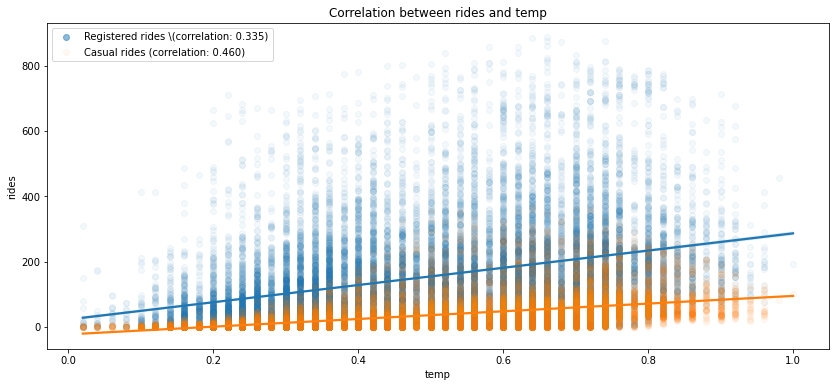

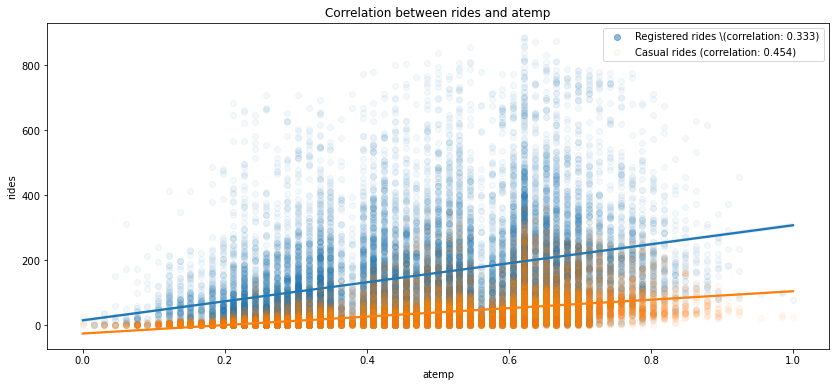

In [42]:
plt.figure(figsize=(14,6))
ax = plot_correlations(preprocessed_data, 'temp')
plt.savefig('correlation_temp.png', format='png')

plt.figure(figsize=(14,6))
ax = plot_correlations(preprocessed_data, 'atemp')
plt.savefig('correlation_atemp.png', format='png')

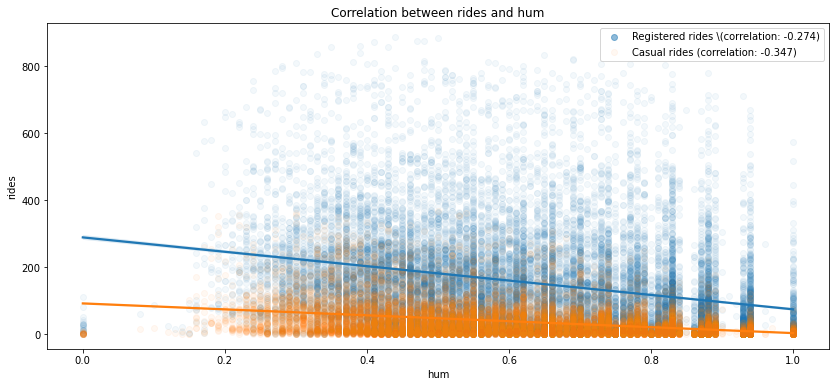

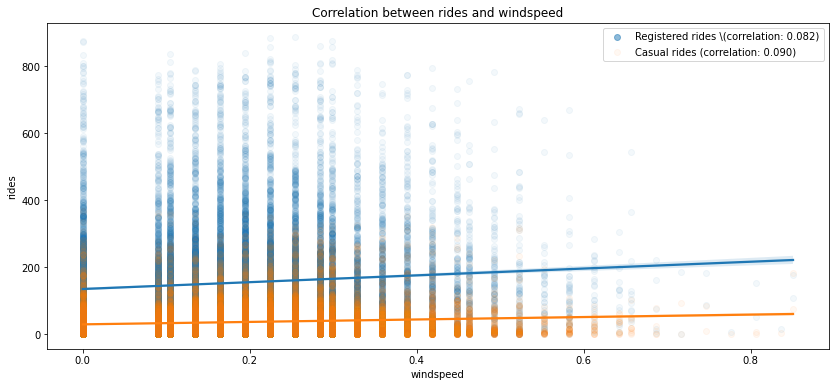

In [44]:
#correlation between the rides and hum, windspeed
plt.figure(figsize=(14,6))
ax=plot_correlations(preprocessed_data,'hum')
plt.savefig('hum_correlation.png',format='png')

plt.figure(figsize=(14,6))
ax=plot_correlations(preprocessed_data,'windspeed')
plt.savefig('windspeed_correlation.png',format='png')

drawbacks of the correlation coefficient is its assumption of a linear
relationship between the two random variables. This is quite a strong assumption as,
most of the time, relationships in nature are not linear. A measure that generalizes
the Pearson's correlation to monotonic relationships between two variables is the
Spearman rank correlation.

# Evaluating the Difference between the Pearson and Spearman Correlations